# News Accounts Following

Visualization that shows the number of followers for each account and the amount that might be news-accounts. 

In [128]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# paths
folder_path = 'following/'
news_accounts_path = 'List of News Accounts (both sections) - news accounts.csv'

#### 1. Load news accounts from CSV & extract followed usernames

In [129]:
# load news accounts from class spreadsheet
def load_news_accounts(news_accounts_path):
    df = pd.read_csv(news_accounts_path)
    news_accounts = df['Username'].tolist()
    return news_accounts

# extract followed usernames from following data
def extract_followed_usernames(json_file_path):
    with open(json_file_path, 'r') as file:
        followed_accounts = json.load(file)
        followed_usernames = [account['UserName'] for account in followed_accounts]
    return followed_usernames

#### 2. Find overlap

In [130]:
# finding overlap between followed accounts and news accounts
def find_overlap(followed_usernames, news_accounts):
    overlap = set(followed_usernames) & set(news_accounts)
    if len(overlap) == 0:
        overlap = "No news accounts identified"
    return overlap

news_accounts = load_news_accounts(news_accounts_path)

"""
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        json_file_path = os.path.join(folder_path, file_name)
        followed_usernames = extract_followed_usernames(json_file_path)
    
        overlap = find_overlap(followed_usernames, news_accounts)
        print(f"Overlap with news accounts in file '{file_name}': {overlap}")"""

def count_news_accounts(followed_usernames, news_accounts):
    news_accounts_followed = len(set(followed_usernames) & set(news_accounts))
    non_news_accounts_followed = len(set(followed_usernames)) - news_accounts_followed
    return news_accounts_followed, non_news_accounts_followed


#### 3. generate bar chart

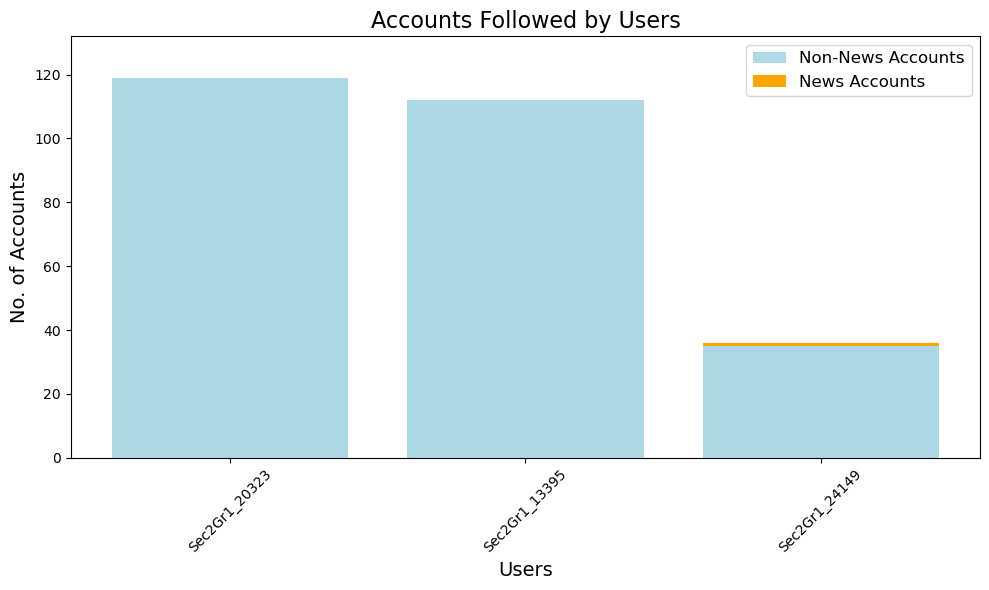

In [131]:
# Convert lists to numpy arrays for plotting
usernames = np.array(usernames)
news_account_counts = np.array(news_account_counts)
non_news_account_counts = np.array(non_news_account_counts)

# Generate stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot non-news accounts first
ax.bar(usernames, non_news_account_counts, label='Non-News Accounts', color='lightblue')

# Plot news accounts on top, starting at the top of non-news accounts
ax.bar(usernames, news_account_counts, bottom=non_news_account_counts, label='News Accounts', color='orange')

ax.set_xlabel('Users', fontsize=14)
ax.set_ylabel('No. of Accounts', fontsize=14)
ax.set_title('Accounts Followed by Users', fontsize=16)
ax.legend(fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add some space between bars and the top of the graph
ax.set_ylim(top = (news_account_counts.max() + non_news_account_counts.max()) * 1.1)

plt.tight_layout()
plt.show()
